# Tenserflow

1. What is Tensorflow
2. Computational graph
3. Variables, Constants and Placeholders in TensorFlow
4. Tensorboard visualization
5. tf.summary.scalar command
6. tf.summary.histogram command

* TensorFlow is a library based on Python that provides different
types of functionality for deep learning models.

* TensorFlow is made up of two terms: Tensor + Flow.
     1. Tensor: representation of data as a multidimensional array.
     2. Flow: refers to the series of operations performed on the tensor.


In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Variables: 
- tensors initialized in a session:
- trainable, defined as tf.Variable()


In [ ]:
import numpy as np
import tensorflow as tf
with tf.compat.v1.Session() as sess:
  a = tf.Variable(0, name = 'input')
  b = tf.constant(1) 

  mid = tf.add(a, b)
  final = tf.compat.v1.assign(a, mid)

  var=tf.compat.v1.initialize_all_variables()

  sess.run(var)
  print(sess.run(a))

  for i in range(3):
    sess.run(final)
    print(sess.run(a))

0
1
2
3


### Constants: 
- fixed value tensors
- not trainable, defined as tf.constant()


In [ ]:
import numpy as np
import tensorflow as tf
with tf.compat.v1.Session() as sess:
  a = tf.constant(3)
  b = tf.constant(5)

  c = a + b
  print(sess.run(c))

8


### Placeholders: 
tensors whose values are unknown during the 
graph construction but passed as input during a session: 
tf.placeholder()


In [ ]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder("float32", None)
y = x**2

with tf.compat.v1.Session() as sess:
  result = sess.run(y, feed_dict = {x:[1,2,3]})
  print(result)

[1. 4. 9.]


### After executing the following code, download the file inside the log folder in the file section and name it "log"

Install the tensorboard to your terminal and go to the given URL

In [ ]:
import tensorflow as tf
a=tf.add(1,2, name="addition_1")
b=tf.multiply(a, 3, name="multiplying_1")
c=tf.add(4, 5, name="addition_2")
d=tf.multiply(c, 6, name="multiplying_2")
e=tf.multiply(4, 5)
f=tf.div(c, 6, name="division")

g=tf.add(b, d)
h=tf.multiply(g, f)

with tf.compat.v1.Session() as sess:
  writer=tf.summary.FileWriter("./logs", sess.graph)
  print(sess.run(h))
  writer.close()

63


### Tf.summary.scalar command

- Randomly pick 100 values from a normal distribution N(0,1) 
- Plot them one after the other

In [ ]:
import tensorflow as tf
tf.reset_default_graph()
s_scalar=tf.get_variable(name='x_scalar', shape=[], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))
first_summary=tf.summary.scalar(name='First_summary', tensor=s_scalar)
init=tf.global_variables_initializer()
with tf.Session() as sess:
  writer=tf.summary.FileWriter('./logs', sess.graph)

  for i in range(100):
    sess.run(init)
    summary=sess.run(first_summary)
    writer.add_summary(summary, i)

### Output
Run the above code, download the generated log file. 
Go to the given URL through your web browser and get the gragh shown below as a result


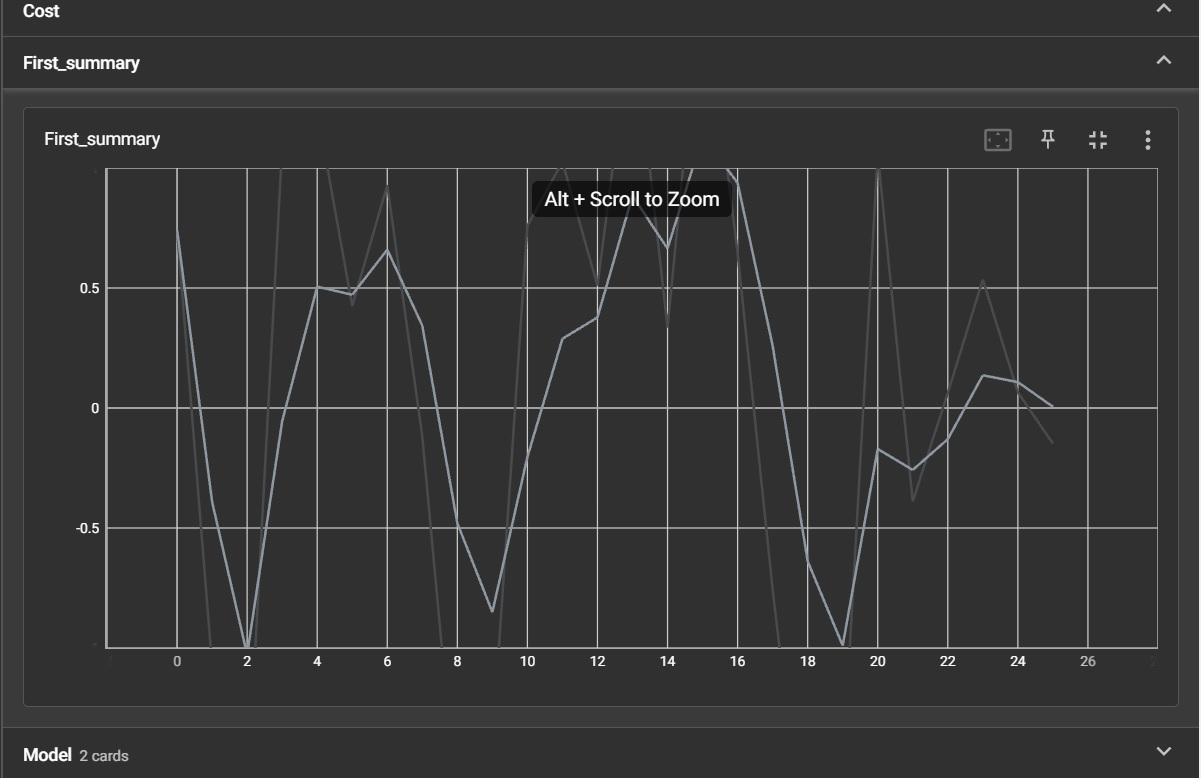

### Output 
Follow the same steps as above for the next graph

In [ ]:
import tensorflow as tf
tf.reset_default_graph()
s_scalar=tf.get_variable(name='x_scalar', shape=[], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))
y_matrix=tf.get_variable(name='y_matrix', shape=[40, 50], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))

first_summary=tf.summary.scalar(name='First_summary', tensor=s_scalar)

histogram_summary=tf.summary.histogram('histogram_summary', y_matrix)

init=tf.global_variables_initializer()
with tf.Session() as sess:
  writer=tf.summary.FileWriter('./logs', sess.graph)

  for i in range(100):
    sess.run(init)
    summary1, summary2=sess.run([first_summary, histogram_summary])
    writer.add_summary(summary1, i)
    writer.add_summary(summary2, i)

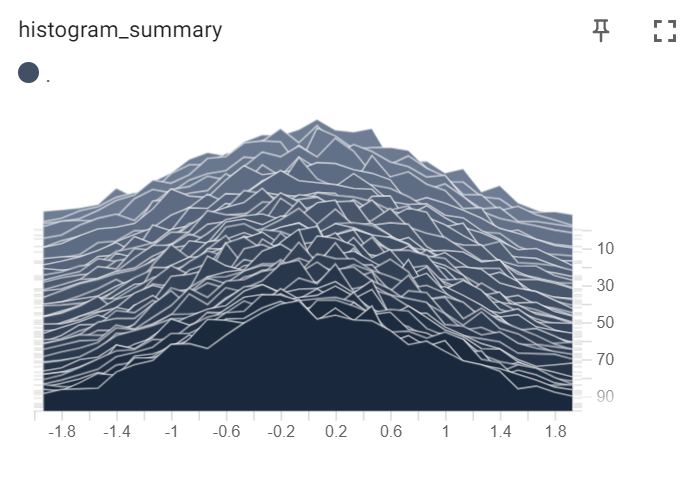